# 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# 2: Data Inspection

In [2]:
df=pd.read_csv('add.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df=df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.shape

(200, 4)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
print(df.columns,'\n')
print('total variables',len(df.columns))

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object') 

total variables 4


In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# 3: Data Cleaning

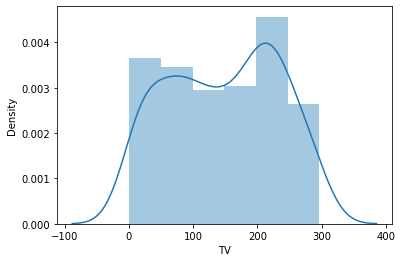

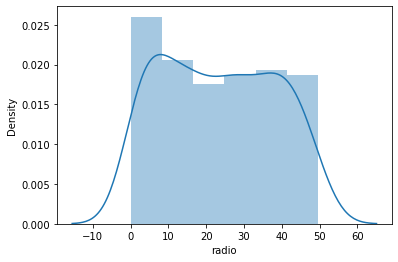

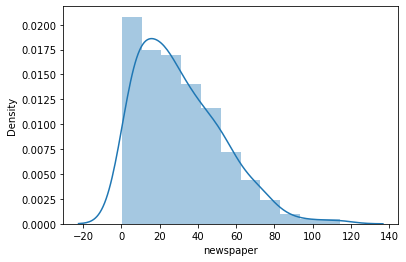

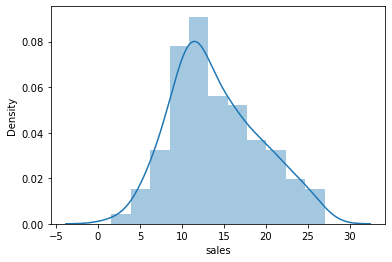

In [11]:
#Ploting skewness
for i in df.columns:
    if(df[i].dtype == np.float64):
        plt.figure()
        sns.distplot(df[i])

We don't have skewed data

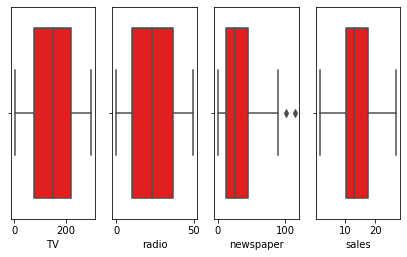

In [12]:
#checking for otliers
collist=df.columns.values
ncol=7
nrow=10
plt.figure(figsize=(nrow,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

Newspaper is having some outliners

In [14]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df.shape

(198, 4)

2 columns have been removed after removing outliners

# 4: Exploratory Data Analysis

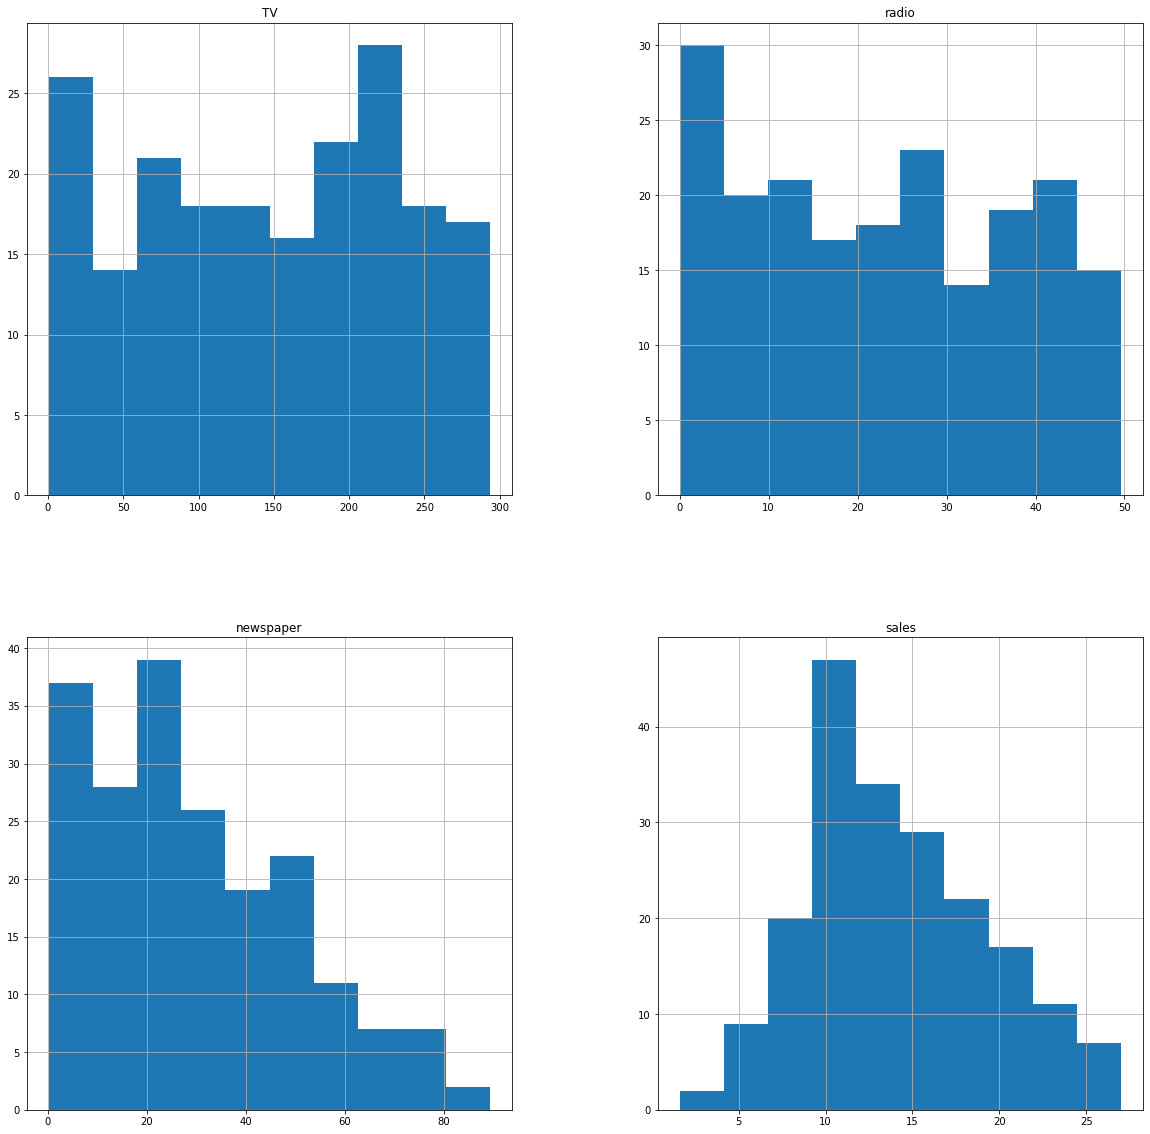

In [15]:
#multivariate analysis
df.hist(figsize=(20,20))
plt.show()

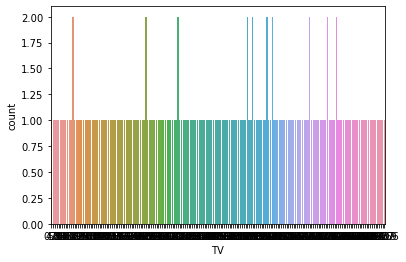

In [16]:
#plotting the countplot

sns.countplot(df['TV'])
plt.show()

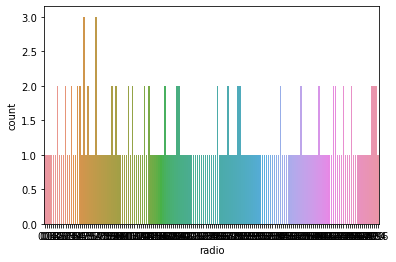

In [17]:
#plotting the countplot

sns.countplot(df['radio'])
plt.show()

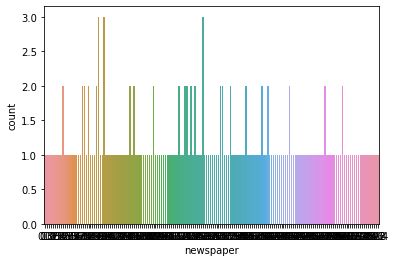

In [18]:
#plotting the countplot

sns.countplot(df['newspaper'])
plt.show()

We are not getting any insights from this data

Text(0.5, 1.0, 'Sctter plt b/w TV and sales')

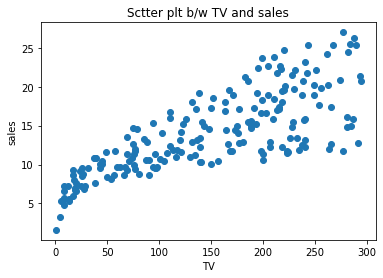

In [19]:
#cheking relation between two variables

plt.scatter(df['TV'],df['sales'])
plt.ylabel('sales')
plt.xlabel('TV')
plt.title('Sctter plt b/w TV and sales')

Tv advertisement shows great response in sales

Text(0.5, 1.0, 'Sctter plt b/w radio and sales')

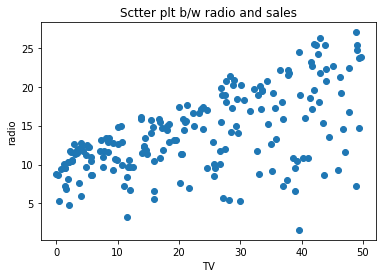

In [20]:
#cheking relation between two variables

plt.scatter(df['radio'],df['sales'])
plt.ylabel('radio')
plt.xlabel('TV')
plt.title('Sctter plt b/w radio and sales')

radio have good results comparatively newspaper but not as good as TV

Text(0.5, 1.0, 'Sctter plt b/w newspaper and sales')

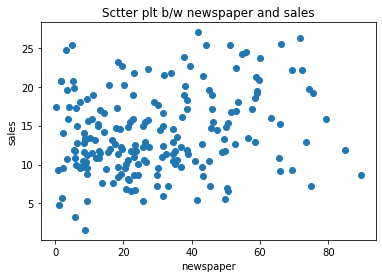

In [22]:
#cheking relation between two variables

plt.scatter(df['newspaper'],df['sales'])
plt.ylabel('sales')
plt.xlabel('newspaper')
plt.title('Sctter plt b/w newspaper and sales')

Newspaper is the giving worst response in all the mediums

<AxesSubplot:>

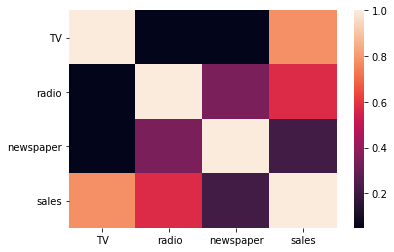

In [23]:
corr=df.corr()
sns.heatmap(corr)

We can clearly see that Tv is very much correlative toward sales where as newspaper is least one.

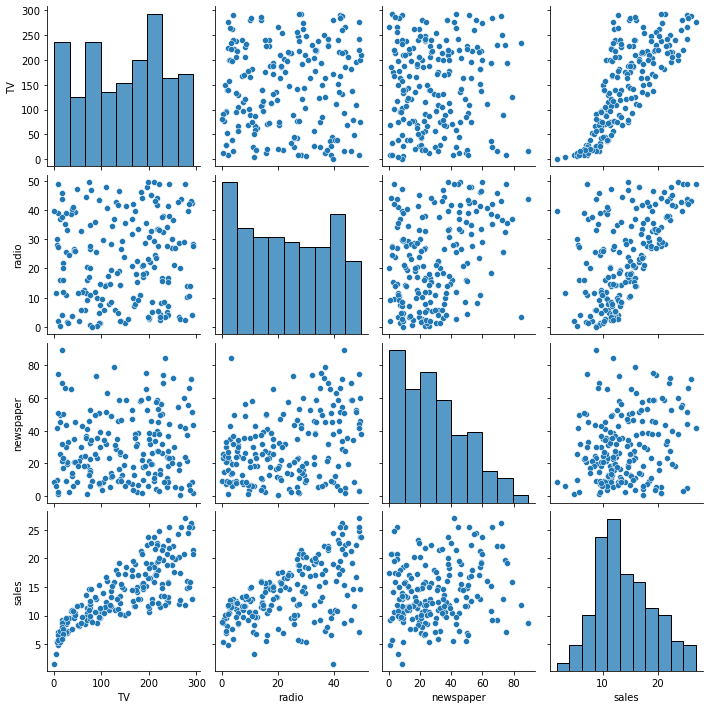

In [24]:
sns.pairplot(df)

# 5: Building Model

In [29]:
X=df.iloc[:,0:3]
print(X)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[198 rows x 3 columns]


In [30]:
y=df.iloc[:,3:]
print(y)

     sales
0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
..     ...
195    7.6
196    9.7
197   12.8
198   25.5
199   13.4

[198 rows x 1 columns]


In [31]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [32]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [33]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [34]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [35]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [36]:
evaluation

,Model,RMSE
0,Linear Regression,1.428263
1,Ridge Regression,1.428236
2,Lasso Regression,1.398368
3,K Neighbors Regressor,1.232067
4,Decision Tree Regressor,0.982599


As we can clearly see Linear performs slighlty better than Ridge and Lasso regression. KNN Regressor and Decision Tree Regressor do not improve the score